# Football Match Performance Analysis – Web Scraping & EDA

## 1. Introduction

This project analyzes football match data collected through web scraping.
The dataset includes match results, team performance metrics, and
disciplinary statistics across multiple seasons. The goal of this analysis
is to explore patterns in match outcomes, team performance, and home
advantage using exploratory data analysis techniques.

## 2. Objectives

The main objectives of this project are:

- To collect real-world football match data through web scraping from an online football statistics source.
- To clean and preprocess the scraped dataset by handling missing values, inconsistent formats, and redundant features.
- To perform exploratory data analysis (EDA) to understand goal patterns, match outcomes, and home vs away performance.
- To analyze team performance metrics such as goals scored, shots, fouls, and disciplinary actions.
- To examine the relationship between match statistics and final match results.
- To identify key insights and trends that influence football match outcomes using statistical techniques and visualizations.

In [4]:
# loading basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3. Data Collection - By Web Scraping

Target Website: https://www.football-data.co.uk/englandm.php

In [5]:
# Reading one CSV file from the website

DF2526= pd.read_csv("https://www.football-data.co.uk/mmz4281/2526/E0.csv")
DF2526

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,E0,15/08/2025,20:00,Liverpool,Bournemouth,4,2,H,1,0,...,2.03,1.78,2.07,1.85,2.03,1.88,1.94,1.76,2.14,1.86
1,E0,16/08/2025,12:30,Aston Villa,Newcastle,0,0,D,0,0,...,2.05,1.80,2.02,1.89,2.06,1.80,1.95,1.74,2.14,1.86
2,E0,16/08/2025,15:00,Brighton,Fulham,1,1,D,0,0,...,1.83,2.03,1.93,2.00,1.84,2.03,1.80,1.96,1.91,2.08
3,E0,16/08/2025,15:00,Sunderland,West Ham,3,0,H,0,0,...,1.95,1.90,1.97,1.95,1.95,1.94,1.86,1.78,2.02,1.97
4,E0,16/08/2025,15:00,Tottenham,Burnley,3,0,H,1,0,...,1.98,1.88,1.99,1.93,1.98,1.91,1.88,1.83,2.07,1.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,E0,17/01/2026,15:00,Tottenham,West Ham,1,2,A,0,1,...,1.85,2.00,NaN,NaN,1.95,2.00,1.80,1.95,1.89,2.11
216,E0,17/01/2026,17:30,Nott'm Forest,Arsenal,0,0,D,0,0,...,1.73,2.08,NaN,NaN,1.80,2.08,1.75,2.04,1.81,2.20
217,E0,18/01/2026,14:00,Wolves,Newcastle,0,0,D,0,0,...,1.95,1.90,NaN,NaN,1.95,1.92,1.89,1.88,2.02,1.97
218,E0,18/01/2026,16:30,Aston Villa,Everton,0,1,A,0,0,...,1.73,2.08,NaN,NaN,1.83,2.10,1.72,2.08,1.81,2.20


##### Link Structure

"https://www.football-data.co.uk/mmz4281/" + "2425" + "/" + "E0/E1/E2/E3/EC" + ".csv"


Link: root + season + league

https://www.football-data.co.uk/mmz4281/2526/E0.csv

https://www.football-data.co.uk/mmz4281/2526/E1.csv

https://www.football-data.co.uk/mmz4281/2526/E2.csv

https://www.football-data.co.uk/mmz4281/2526/E3.csv

https://www.football-data.co.uk/mmz4281/2526/EC.csv

https://www.football-data.co.uk/mmz4281/2425/E0.csv

https://www.football-data.co.uk/mmz4281/2425/E1.csv

https://www.football-data.co.uk/mmz4281/2425/E2.csv

https://www.football-data.co.uk/mmz4281/2425/E3.csv

https://www.football-data.co.uk/mmz4281/2425/EC.csv

In [6]:
# making a list of all leagues in 2025-26 season

leagues = ["E0","E1","E2","E3","EC"]
leagues_2526 = []
root = "https://www.football-data.co.uk/mmz4281/"
for league in leagues:
    df = pd.read_csv(root + "2526" + "/" + league + ".csv", encoding="unicode_escape")
    leagues_2526.append(df)

In [7]:
type(leagues_2526)

list

In [8]:
len(leagues_2526)

5

In [10]:
# elements of the list will be a dataframes of league matches

#leagues_2526[0]
#leagues_2526[1]
#leagues_2526[2]
#leagues_2526[3]
leagues_2526[4]

,ï»¿Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,EC,09/08/2025,15:00,Altrincham,Aldershot,3,2,H,2,0,...,1.90,1.90,1.92,1.93,1.90,1.90,1.86,1.84,2.00,1.99
1,EC,09/08/2025,15:00,Boreham Wood,Rochdale,0,2,A,0,0,...,2.00,1.80,2.05,1.82,2.02,1.80,1.96,1.75,2.06,1.89
2,EC,09/08/2025,15:00,Brackley Town,Eastleigh,1,0,H,1,0,...,2.00,1.80,2.14,1.72,2.03,1.80,1.96,1.75,2.06,1.84
3,EC,09/08/2025,15:00,Braintree Town,Halifax,3,0,H,2,0,...,1.93,1.88,1.97,1.88,1.93,1.88,1.88,1.82,1.97,1.98
4,EC,09/08/2025,15:00,Gateshead,Southend,0,3,A,0,1,...,1.83,1.98,1.67,2.19,1.83,2.04,1.75,1.96,1.84,2.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,EC,20/01/2026,19:45,Truro,Brackley Town,3,3,D,0,1,...,1.75,2.05,NaN,NaN,1.75,2.05,1.69,2.04,NaN,NaN
319,EC,21/01/2026,19:45,Carlisle,York,0,3,A,0,1,...,1.80,2.00,NaN,NaN,1.80,2.00,1.77,1.94,1.87,2.06
320,EC,21/01/2026,19:45,Forest Green,Altrincham,1,1,D,0,1,...,2.00,1.80,NaN,NaN,2.00,1.80,1.95,1.75,2.12,1.81
321,EC,21/01/2026,19:45,Halifax,Morecambe,1,0,H,1,0,...,1.78,2.03,NaN,NaN,1.80,2.03,1.76,1.94,1.93,2.05


In [11]:
for season in range(23,26):
    print(str(season) + str(season+1))

2324
2425
2526


In [12]:
# Creating a list of all seasons and leagues

leagues = ["E0","E1","E2","E3","EC"]
AllSeasonLeagues = []
root = "https://www.football-data.co.uk/mmz4281/"
for league in leagues:
    for season in range(23,26):
        DF = pd.read_csv(root + str(season) + str(season+1) + "/" + league + ".csv")
        DF.insert(1,"Season",season)
        AllSeasonLeagues.append(DF)

In [13]:
type(AllSeasonLeagues)

list

In [14]:
# total (3 seasons into 5 leagues)

len(AllSeasonLeagues)

15

In [15]:
# selecting a particular season and league

AllSeasonLeagues[14]

,Div,Season,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,BFECAHH,BFECAHA
0,EC,25,09/08/2025,15:00,Altrincham,Aldershot,3,2,H,2,...,1.90,1.90,1.92,1.93,1.90,1.90,1.86,1.84,2.00,1.99
1,EC,25,09/08/2025,15:00,Boreham Wood,Rochdale,0,2,A,0,...,2.00,1.80,2.05,1.82,2.02,1.80,1.96,1.75,2.06,1.89
2,EC,25,09/08/2025,15:00,Brackley Town,Eastleigh,1,0,H,1,...,2.00,1.80,2.14,1.72,2.03,1.80,1.96,1.75,2.06,1.84
3,EC,25,09/08/2025,15:00,Braintree Town,Halifax,3,0,H,2,...,1.93,1.88,1.97,1.88,1.93,1.88,1.88,1.82,1.97,1.98
4,EC,25,09/08/2025,15:00,Gateshead,Southend,0,3,A,0,...,1.83,1.98,1.67,2.19,1.83,2.04,1.75,1.96,1.84,2.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,EC,25,20/01/2026,19:45,Truro,Brackley Town,3,3,D,0,...,1.75,2.05,NaN,NaN,1.75,2.05,1.69,2.04,NaN,NaN
319,EC,25,21/01/2026,19:45,Carlisle,York,0,3,A,0,...,1.80,2.00,NaN,NaN,1.80,2.00,1.77,1.94,1.87,2.06
320,EC,25,21/01/2026,19:45,Forest Green,Altrincham,1,1,D,0,...,2.00,1.80,NaN,NaN,2.00,1.80,1.95,1.75,2.12,1.81
321,EC,25,21/01/2026,19:45,Halifax,Morecambe,1,0,H,1,...,1.78,2.03,NaN,NaN,1.80,2.03,1.76,1.94,1.93,2.05


In [81]:
# to combine all the leagues and seasons in a single dataframe

DF_Concat = pd.concat(AllSeasonLeagues)
DF_Concat

,Div,Season,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,BMGMCA,BVCH,BVCD,BVCA,CLCH,CLCD,CLCA,LBCH,LBCD,LBCA
0,E0,23,11/08/2023,20:00,Burnley,Man City,0,3,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,23,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,23,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,23,12/08/2023,15:00,Brighton,Luton,4,1,H,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,23,12/08/2023,15:00,Everton,Fulham,0,1,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,EC,25,20/01/2026,19:45,Truro,Brackley Town,3,3,D,0,...,2.75,2.38,3.10,2.88,NaN,NaN,NaN,NaN,NaN,NaN
319,EC,25,21/01/2026,19:45,Carlisle,York,0,3,A,0,...,2.20,2.75,3.60,2.20,NaN,NaN,NaN,NaN,NaN,NaN
320,EC,25,21/01/2026,19:45,Forest Green,Altrincham,1,1,D,0,...,7.50,1.25,5.25,9.50,NaN,NaN,NaN,NaN,NaN,NaN
321,EC,25,21/01/2026,19:45,Halifax,Morecambe,1,0,H,1,...,3.45,1.80,3.80,3.70,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Organize all the data in a dictionary with original name of league as key

dict_leagues = {'English Premier League':'E0','English Championship':'E1','English League 1':'E2','English League 2':'E3', 'English Conference (National League)':'EC'}

dict_leagues

{'English Premier League': 'E0',
 'English Championship': 'E1',
 'English League 1': 'E2',
 'English League 2': 'E3',
 'English Conference (National League)': 'EC'}

In [18]:
dict_leagues['English Premier League']

'E0'

In [19]:
dict_historical_data = {}

for league in dict_leagues:
    frames = []
    for season in range(23,26):
        df=pd.read_csv(root + str(season) + str(season+1) + "/" + dict_leagues[league] + ".csv")
        df.insert(1,"season",season)
        frames.append(df)
    df_concat = pd.concat(frames)
    dict_historical_data[league] = df_concat

In [20]:
type(dict_historical_data)

dict

In [21]:
len(dict_historical_data)

5

In [22]:
dict_historical_data['English Premier League']

,Div,season,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,BMGMCA,BVCH,BVCD,BVCA,CLCH,CLCD,CLCA,LBCH,LBCD,LBCA
0,E0,23,11/08/2023,20:00,Burnley,Man City,0,3,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,23,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,23,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,23,12/08/2023,15:00,Brighton,Luton,4,1,H,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,23,12/08/2023,15:00,Everton,Fulham,0,1,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,E0,25,17/01/2026,15:00,Tottenham,West Ham,1,2,A,0,...,4.40,1.83,3.8,4.1,1.85,3.75,4.00,1.83,3.75,4.00
216,E0,25,17/01/2026,17:30,Nott'm Forest,Arsenal,0,0,D,0,...,1.61,5.75,3.9,1.6,5.50,3.90,1.61,5.25,3.90,1.61
217,E0,25,18/01/2026,14:00,Wolves,Newcastle,0,0,D,0,...,1.74,4.60,4.1,1.7,4.33,3.90,1.75,4.33,3.90,1.75
218,E0,25,18/01/2026,16:30,Aston Villa,Everton,0,1,A,0,...,6.10,1.55,3.9,6.5,1.60,4.00,5.50,1.60,4.00,5.25


In [58]:
# Raw Dataset

DF_Concat

,Div,Season,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,BMGMCA,BVCH,BVCD,BVCA,CLCH,CLCD,CLCA,LBCH,LBCD,LBCA
0,E0,23,11/08/2023,20:00,Burnley,Man City,0,3,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,23,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,23,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,23,12/08/2023,15:00,Brighton,Luton,4,1,H,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,23,12/08/2023,15:00,Everton,Fulham,0,1,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,EC,25,20/01/2026,19:45,Truro,Brackley Town,3,3,D,0,...,2.75,2.38,3.10,2.88,NaN,NaN,NaN,NaN,NaN,NaN
319,EC,25,21/01/2026,19:45,Carlisle,York,0,3,A,0,...,2.20,2.75,3.60,2.20,NaN,NaN,NaN,NaN,NaN,NaN
320,EC,25,21/01/2026,19:45,Forest Green,Altrincham,1,1,D,0,...,7.50,1.25,5.25,9.50,NaN,NaN,NaN,NaN,NaN,NaN
321,EC,25,21/01/2026,19:45,Halifax,Morecambe,1,0,H,1,...,3.45,1.80,3.80,3.70,NaN,NaN,NaN,NaN,NaN,NaN


#### Feature Understanding (Key Columns)

FTHG - Full Time Home Goals

FTAG - Full Time Away Goals

HTR	 - Half Time Result (H - Home team , D - Draw , Away team)

FTR	 - Full Time / Match Result (H - Home team , D - Draw , Away team)

HTHG - Half Time Home Goals

HTAG - Half Time Away Goals

HS/AS -	Shots (Home/Away)

HST/AST	- Shots on Target (Home/Away)

HC/AC - Corners (Home/Away)

HF/AF - Fouls (Home/Away)

HY/AY -	Yellow Cards (Home/Away)

HR/AR -	Red Cards (Home/Away)

## 4. Data Cleaning and Preprocessing

In [23]:
# selecting only the key columns

df = DF_Concat[['Div', 'Season', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]
df

,Div,Season,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,23,11/08/2023,20:00,Burnley,Man City,0,3,A,0,...,1.0,8.0,11.0,8.0,6.0,5.0,0,0,1,0
1,E0,23,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,...,7.0,2.0,12.0,12.0,8.0,3.0,2,2,0,0
2,E0,23,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,...,5.0,3.0,9.0,14.0,10.0,4.0,1,4,0,0
3,E0,23,12/08/2023,15:00,Brighton,Luton,4,1,H,1,...,12.0,3.0,11.0,12.0,6.0,7.0,2,2,0,0
4,E0,23,12/08/2023,15:00,Everton,Fulham,0,1,A,0,...,9.0,2.0,12.0,6.0,10.0,4.0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,EC,25,20/01/2026,19:45,Truro,Brackley Town,3,3,D,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0,0
319,EC,25,21/01/2026,19:45,Carlisle,York,0,3,A,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
320,EC,25,21/01/2026,19:45,Forest Green,Altrincham,1,1,D,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2,0,0
321,EC,25,21/01/2026,19:45,Halifax,Morecambe,1,0,H,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,4,0,0


In [24]:
# Dataset Overview

print(df.describe())

print("#############")

print(df.info())

            Season         FTHG         FTAG         HTHG         HTAG  \
count  6658.000000  6658.000000  6658.000000  6658.000000  6658.000000   
mean     23.833884     1.498047     1.222589     0.671823     0.541604   
std       0.764060     1.256288     1.106750     0.824181     0.747433   
min      23.000000     0.000000     0.000000     0.000000     0.000000   
25%      23.000000     1.000000     0.000000     0.000000     0.000000   
50%      24.000000     1.000000     1.000000     0.000000     0.000000   
75%      24.000000     2.000000     2.000000     1.000000     1.000000   
max      25.000000     9.000000     8.000000     5.000000     5.000000   

                HS           AS          HST          AST           HF  \
count  5231.000000  5231.000000  5231.000000  5231.000000  5231.000000   
mean     13.436437    11.098452     4.512904     3.740776    10.886829   
std       5.171303     4.672942     2.403188     2.195968     3.458218   
min       0.000000     0.000000     0

In [25]:
# Missing Value Analysis - All columns have love missing values

df.isna().mean().sort_values(ascending=False)

HS          0.214329
AC          0.214329
HC          0.214329
AF          0.214329
HF          0.214329
AST         0.214329
HST         0.214329
AS          0.214329
Season      0.000000
HR          0.000000
AY          0.000000
HY          0.000000
Div         0.000000
HTR         0.000000
HTAG        0.000000
HTHG        0.000000
FTR         0.000000
FTAG        0.000000
FTHG        0.000000
AwayTeam    0.000000
HomeTeam    0.000000
Time        0.000000
Date        0.000000
AR          0.000000
dtype: float64

### Missing Value Analysis:

Since shots, fouls, and corners are missing for approximately 21% of the matches, analyses involving these metrics were performed only on available data. Goal-based analyses, including match outcomes and scoring patterns, utilized the complete dataset as goal-related variables contained no missing values.

In [26]:
# Convert Date column

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

Since shots, fouls, and corners are missing for ~21% of matches, analyses involving these metrics were performed only on available data, while goal-based analyses used the full dataset.

## 5. EDA & Analysis

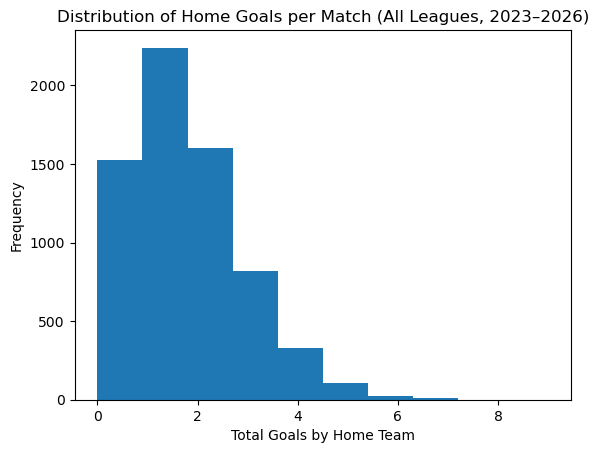

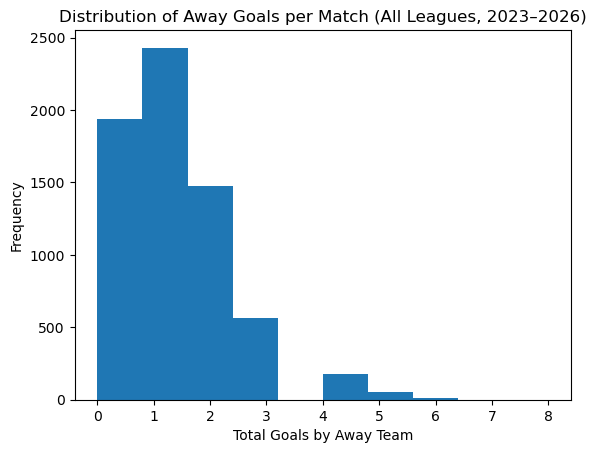

In [78]:
# Goal Distribution (Home vs Away)

plt.hist(df['FTHG'], bins=10)
plt.title("Distribution of Home Goals per Match (All Leagues, 2023–2026)")
plt.xlabel("Total Goals by Home Team")
plt.ylabel("Frequency")
plt.show()

plt.hist(df['FTAG'], bins=10)
plt.title("Distribution of Away Goals per Match (All Leagues, 2023–2026)")
plt.xlabel("Total Goals by Away Team")
plt.ylabel("Frequency")
plt.show()

In [34]:
# Home vs Away Advantage (All seasons together)

df['FTR'].value_counts(normalize=True) * 100

FTR
H    43.466506
A    31.195554
D    25.337939
Name: proportion, dtype: float64

Season  FTR
23      H      43.894900
        A      32.225657
        D      23.879444
24      H      42.928903
        A      30.177743
        D      26.893354
25      H      43.657220
        A      31.174089
        D      25.168691
Name: proportion, dtype: float64


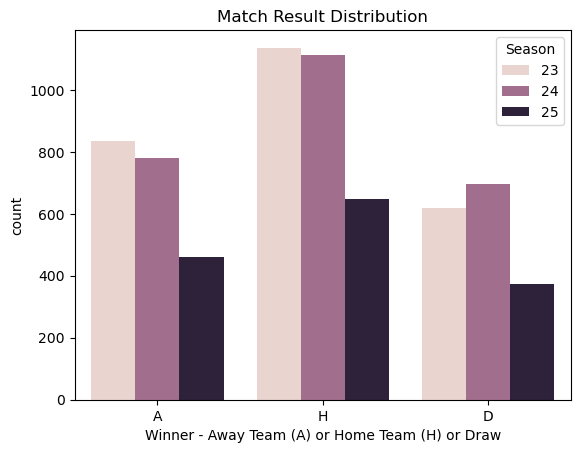

In [73]:
# Home vs Away Advantage (by each seasons)

print(df.groupby("Season")['FTR'].value_counts(normalize=True) * 100)

sns.countplot(x='FTR', data=df, hue = 'Season')
plt.title("Match Result Distribution")
plt.xlabel("Winner - Away Team (A) or Home Team (H) or Draw")
plt.show()

2.720636827876239


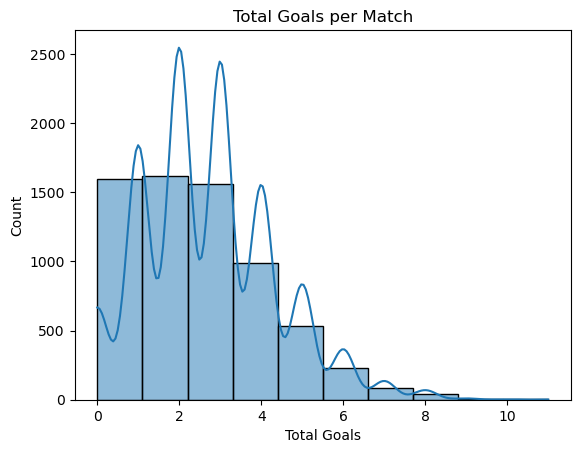

In [74]:
# Average Goals per Match

df['TotalGoals'] = df['FTHG'] + df['FTAG']
print(df['TotalGoals'].mean())

sns.histplot(df['TotalGoals'], bins=10, kde=True)
plt.title("Total Goals per Match")
plt.xlabel("Total Goals")
plt.show()

In [42]:
# Top 10 goal scoring teams at Home - Average Goals Scored

home_goals = df.groupby('HomeTeam')['FTHG'].mean().sort_values(ascending=False)
home_goals.head(10)

HomeTeam
Man City        2.469388
Newcastle       2.265306
Arsenal         2.224490
Leeds           2.192982
Chesterfield    2.186441
Liverpool       2.183673
York            2.183333
Barnet          2.172414
Wrexham         2.114754
Aston Villa     2.040816
Name: FTHG, dtype: float64

In [43]:
# Top 10 goal scoring teams on away games - Average Goals Scored

away_goals = df.groupby('AwayTeam')['FTAG'].mean().sort_values(ascending=False)
away_goals.head(10)

AwayTeam
Liverpool      2.000000
Man City       1.877551
Arsenal        1.857143
Scunthorpe     1.785714
Tottenham      1.693878
Gateshead      1.666667
Bournemouth    1.653061
Chelsea        1.653061
Stockport      1.637931
Barnsley       1.631579
Name: FTAG, dtype: float64

In [45]:
# Top 10 goal conceding teams at Home games - Average Goals Conceded

home_conceded = df.groupby('HomeTeam')['FTAG'].mean().sort_values(ascending=False)
home_conceded.head(10)

HomeTeam
West Ham            1.775510
Dorking             1.739130
Wolves              1.734694
Oxford City         1.695652
Fylde               1.673913
Brentford           1.612245
Sheffield United    1.611111
Aldershot           1.610169
Eastleigh           1.603448
Southampton         1.589286
Name: FTAG, dtype: float64

In [46]:
# Top 10 goal conceding teams at Away games - Average Goals Conceded

away_conceded = df.groupby('AwayTeam')['FTHG'].mean().sort_values(ascending=False)
away_conceded.head(10)

AwayTeam
Truro          2.461538
Oxford City    2.391304
Ebbsfleet      2.282609
Luton          2.111111
Aldershot      2.100000
Tamworth       2.027027
Bournemouth    2.020408
Morecambe      1.966667
Fylde          1.956522
Dorking        1.956522
Name: FTHG, dtype: float64

In [47]:
# Discipline Analysis (Cards)

df[['HY', 'AY', 'HR', 'AR']].describe()

,HY,AY,HR,AR
count,6658.000000,6658.000000,6658.000000,6658.000000
mean,1.793031,2.063533,0.061280,0.081256
std,1.301066,1.351431,0.249078,0.285086
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,0.000000,0.000000
75%,3.000000,3.000000,0.000000,0.000000
max,8.000000,9.000000,2.000000,2.000000


HY
1    1977
2    1852
3    1074
0    1063
4     488
5     151
6      44
7       8
8       1
Name: count, dtype: int64
AY
2    1897
1    1703
3    1337
0     764
4     652
5     227
6      62
7      13
8       2
9       1
Name: count, dtype: int64


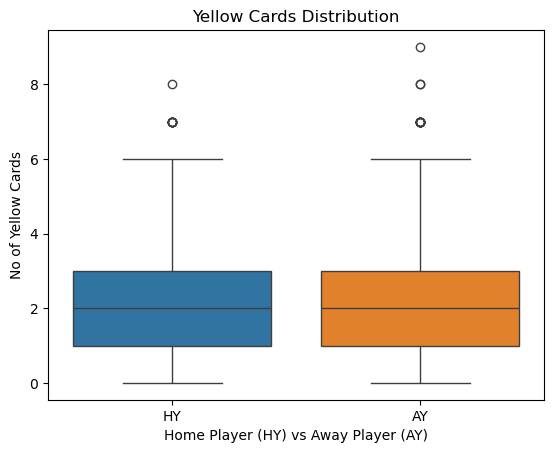

In [75]:
# Yellow Cards Distribution - Home Players vs Away Players

print(df['HY'].value_counts())
print(df['AY'].value_counts())

sns.boxplot(data=df[['HY','AY']])
plt.title("Yellow Cards Distribution")
plt.xlabel("Home Player (HY) vs Away Player (AY)")
plt.ylabel("No of Yellow Cards")
plt.show()

HR
0    6265
1     378
2      15
Name: count, dtype: int64
AR
0    6139
1     497
2      22
Name: count, dtype: int64


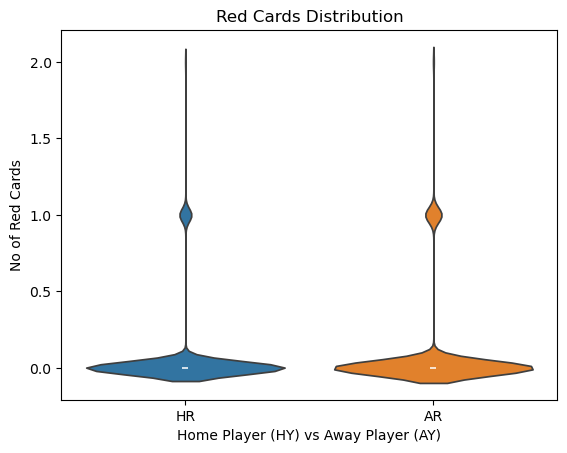

In [76]:
# Red Cards Distribution - Home Players vs Away Players

print(df['HR'].value_counts())
print(df['AR'].value_counts())

sns.violinplot(data=df[['HR','AR']])
plt.title("Red Cards Distribution")
plt.xlabel("Home Player (HY) vs Away Player (AY)")
plt.ylabel("No of Red Cards")
plt.show()

Correlation between shots on target and goals: 0.566


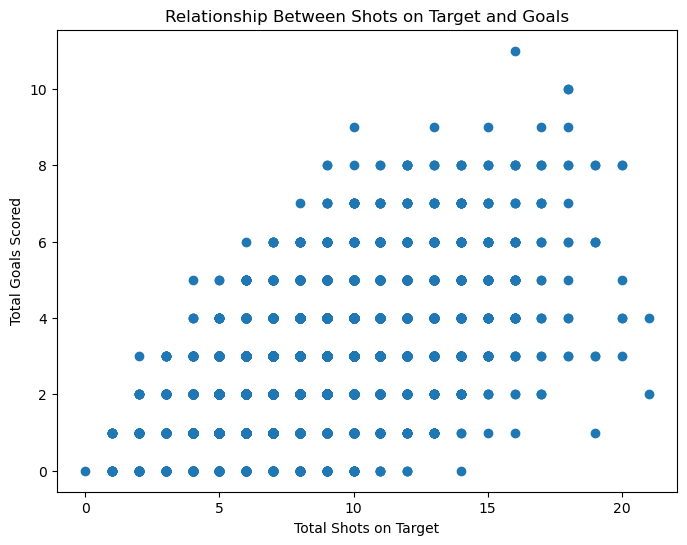

In [65]:
# correlation b/w shots on target and goals scored

df['Total_Shots_On_Target'] = df['HST'] + df['AST']
df['Total_Goals'] = df['FTHG'] + df['FTAG']

correlation = df['Total_Shots_On_Target'].corr(df['Total_Goals'])
print(f"Correlation between shots on target and goals: {correlation:.3f}")

plt.figure(figsize=(8, 6))
plt.scatter(df['Total_Shots_On_Target'], df['Total_Goals'])
plt.xlabel("Total Shots on Target")
plt.ylabel("Total Goals Scored")
plt.title("Relationship Between Shots on Target and Goals")
plt.show()

FTR                   A          D          H
HT_Leader                                    
Away Leading  67.815421  20.385514  11.799065
Home Leading   6.663725  17.166814  76.169462
Level         28.544776  35.410448  36.044776


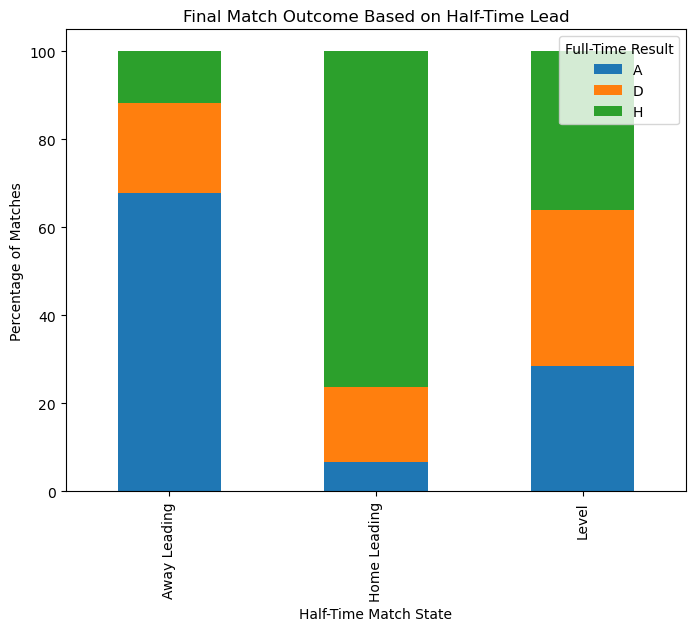

In [68]:
# Half-Time Lead vs Full-Time Result

df['HT_Leader'] = df.apply(
    lambda x: 'Home Leading' if x['HTHG'] > x['HTAG']
    else 'Away Leading' if x['HTHG'] < x['HTAG']
    else 'Level',
    axis=1
)

print(pd.crosstab(df['HT_Leader'], df['FTR'], normalize='index') * 100)

summary = pd.crosstab(df['HT_Leader'], df['FTR'], normalize='index') * 100
summary.plot(kind='bar', stacked=True, figsize=(8,6))
plt.xlabel("Half-Time Match State")
plt.ylabel("Percentage of Matches")
plt.title("Final Match Outcome Based on Half-Time Lead")
plt.legend(title="Full-Time Result")
plt.show()

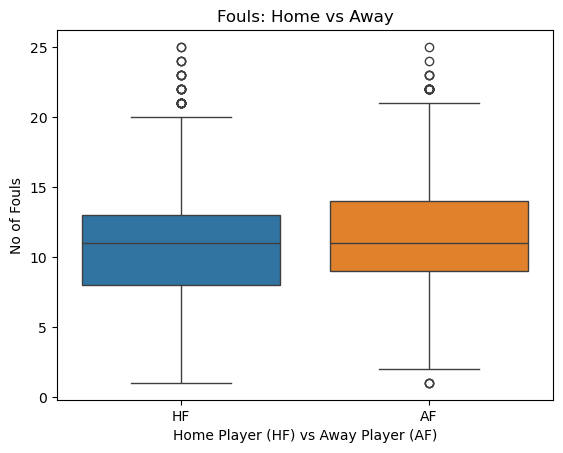

In [77]:
# Fouls committed - Home vs Away

sns.boxplot(data=df[['HF', 'AF']])
plt.title("Fouls: Home vs Away")
plt.xlabel("Home Player (HF) vs Away Player (AF)")
plt.ylabel("No of Fouls")
plt.show()

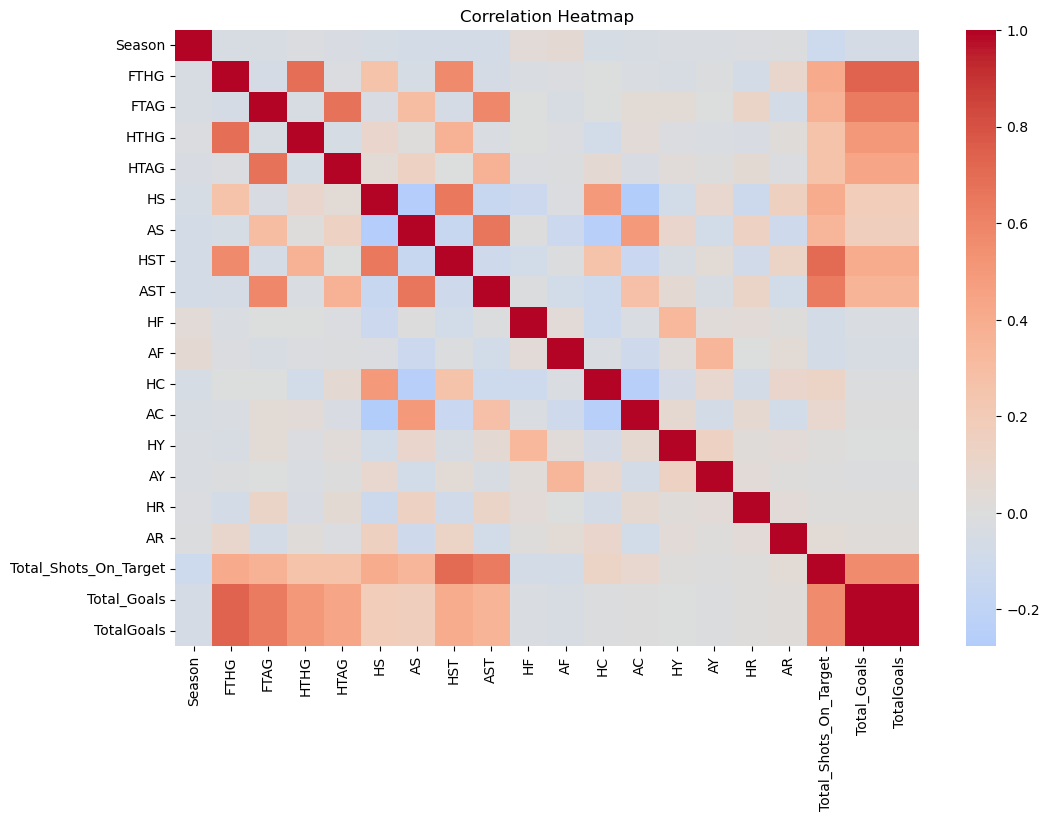

In [83]:
# Correlation Analysis

numeric_cols = df.select_dtypes(include=np.number)
corr = numeric_cols.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

From the above correlation heatmap, it can be seen that shots on target show the strongest positive correlation with goals, while fouls and cards show weak correlation, indicating discipline affects match flow more than scoring outcomes.

## Key Findings and Insights:

 - Home teams win ~43–45% of matches → clear home advantage

 - Average goals per match ≈ 2.7

 - Yellow cards are much more frequent than red cards

 - Away team players gets more yellow and red cards than home team players

 - Find out top 10 goal scoring/conceding team in both Home and Away matches

 - Shots on target strongly correlate with goals scored

 - Teams leading (by goals count) at half-time are far more likely to win the match

 - Away teams commit slightly more fouls than home teams

## Future Work:

This project can be further extended by transforming the exploratory analysis into actionable insights for football performance evaluation. Future work may include developing interactive dashboards using tools such as Power BI to visualize key performance indicators (KPIs) like home advantage, goal conversion rates, disciplinary trends, and team-wise performance comparisons across seasons.

Additional analysis could focus on creating team-level KPIs, including average goals scored, goals conceded, shots on target efficiency, and disciplinary impact, to enable comparative performance benchmarking across leagues and seasons.

Segmenting the analysis by season, league, and match context (home vs away, half-time lead vs trailing) would provide deeper insights into tactical and situational performance trends.

Furthermore, automated data pipelines for periodic data updates and reporting could be implemented to support continuous monitoring of football performance metrics, making the analysis more scalable and suitable for real-world decision-making.

This analysis can also be extended by developing predictive models for match outcomes and goal scoring using machine learning techniques. Additional work could include team strength evaluation, expected goals estimation, and season-wise trend analysis to enhance predictive insights.